In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CartPole-v0')

In [3]:
#PARAMETERS
MAXSTATES = 10**4
GAMMA = 0.9
ALPHA = 0.01

In [4]:
def create_bins():
    #observation -> [cart_position, card_velocity, pole_angle, pole_velocity]
    # position c [-2.4, 2.4] for the cart, [-3, 3] for the pole angle
    # velocity c )-inf , inf( we clip that to [-4, 4] 
    # after analysis of the exp observations, the cart and the pole speed are limited to +/- 3.5
    
    bins = np.zeros((4, 10))
    # bins[0] = np.random.vonmises(0, 2.5, 10) ???
    bins[0] = np.linspace(-2.4, 2.4, 10)
    bins[1] = np.linspace(-4, 4, 10)
    bins[2] = np.linspace(-3, .3, 10)
    bins[3] = np.linspace(-4, 4, 10)
    
    return bins

In [5]:
def assign_bins(observation, bins):
    #assigne an observation to a bin
    state = np.zeros(4)
    for i in range(4):
        state[i] = np.digitize(observation[i], bins[i])
    return state

In [6]:
def assign_bins(observation, bins):
    state = np.zeros(4)
    for i in range(4):
        state[i] = np.digitize(observation[i], bins[i])
    return state

In [7]:
def get_state_as_string(state):
    string_state = ''.join(str(int(e)) for e in state)
    return string_state

In [8]:
def get_all_states_as_string():
    states = []
    for i in range(MAXSTATES):
        states.append(str(i).zfill(4))
    return states

In [9]:
def max_dict(d):
    max_v = float('-inf')
    for key, val in d.items():
        if val > max_v:
            max_v = val
            max_key = key
    return max_key, max_v

In [10]:
def initialize_Q_table():
    Q = {}

    all_states = get_all_states_as_string()
    for state in all_states:
        Q[state] = {}
        for action in range(env.action_space.n):
            Q[state][action] = 0
    return Q

In [11]:
def play_one_game(bins, Q, epsilon=0.5):
    observation = env.reset()
    done = False
    count_moves = 0
    state = get_state_as_string(assign_bins(observation, bins))
    total_reward = 0
    while not done:
        count_moves += 1
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else: action = max_dict(Q[state])[0]
        
        observation, reward, done, _ = env.step(action)
        
        total_reward += reward
        
        if done and count_moves < 20:
            reward = -100
            
        state_new = get_state_as_string(assign_bins(observation, bins))
        
        a1, max_qs1a1 = max_dict(Q[state_new])
        Q[state][action] += ALPHA * (reward + GAMMA * max_qs1a1 - Q[state][action])
        state, action = state_new, a1
        
    return total_reward, count_moves

In [12]:
def play_many_games(bins, N=10000):
    Q = initialize_Q_table()

    length = []
    reward = []
    for n in range(N):
        if n > 1:
            epsilon = 1.0 / np.sqrt(n+1)
        else:
            epsilon = 0

        episode_reward, episode_length = play_one_game(bins, Q, epsilon)

        if n % 100 == 0:
            print(n, '%.4f' % epsilon, episode_reward)
        length.append(episode_length)
        reward.append(episode_reward)

    return length, reward

In [13]:
def plot_running_avg(totalrewards):
    N = len(totalrewards)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(totalrewards[max(0, t-100):(t+1)])
    plt.plot(running_avg)
    plt.title("Running Average")
    plt.show()

0 0.0000 10.0
100 0.0995 10.0
200 0.0705 56.0
300 0.0576 54.0
400 0.0499 56.0
500 0.0447 54.0
600 0.0408 58.0
700 0.0378 64.0
800 0.0353 55.0
900 0.0333 56.0
1000 0.0316 58.0
1100 0.0301 65.0
1200 0.0289 74.0
1300 0.0277 62.0
1400 0.0267 52.0
1500 0.0258 52.0
1600 0.0250 63.0
1700 0.0242 56.0
1800 0.0236 54.0
1900 0.0229 57.0
2000 0.0224 51.0
2100 0.0218 66.0
2200 0.0213 72.0
2300 0.0208 74.0
2400 0.0204 65.0
2500 0.0200 58.0
2600 0.0196 61.0
2700 0.0192 60.0
2800 0.0189 60.0
2900 0.0186 60.0
3000 0.0183 52.0
3100 0.0180 60.0
3200 0.0177 50.0
3300 0.0174 52.0
3400 0.0171 57.0
3500 0.0169 58.0
3600 0.0167 72.0
3700 0.0164 60.0
3800 0.0162 70.0
3900 0.0160 65.0
4000 0.0158 57.0
4100 0.0156 53.0
4200 0.0154 62.0
4300 0.0152 61.0
4400 0.0151 70.0
4500 0.0149 64.0
4600 0.0147 51.0
4700 0.0146 61.0
4800 0.0144 63.0
4900 0.0143 58.0
5000 0.0141 56.0
5100 0.0140 55.0
5200 0.0139 54.0
5300 0.0137 65.0
5400 0.0136 72.0
5500 0.0135 62.0
5600 0.0134 63.0
5700 0.0132 67.0
5800 0.0131 72.0
5900 0.01

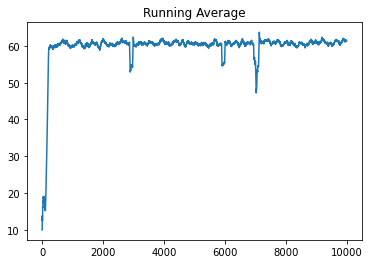

In [14]:
if __name__ == '__main__':
    bins = create_bins()
    episode_lengths, episode_rewards = play_many_games(bins)

    plot_running_avg(episode_rewards)